In [4]:
import jqdatasdk
jqdatasdk.auth('13816232729', 'Marcozhuang0204')

提示：当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口 panel 参数将固定为 False
注意：0.25 以上版本 pandas 不支持 panel，如使用该数据结构和相关函数请注意修改
auth success 


In [226]:
import pandas as pd
df = pd.DataFrame(jqdatasdk.get_bars(security = '600000.XSHG', count = 48, unit = '1M', end_dt = '2020-05-01'))
df.to_csv('C:/Users/Marco/Desktop/2019080344_fbdqa-1.csv')

In [227]:
import os
import time,datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

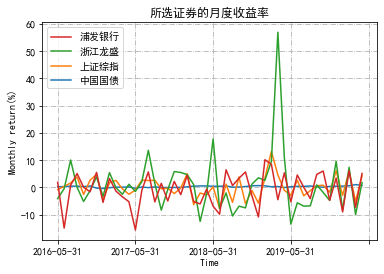

In [244]:
# 大盘股月度收益率
df1=pd.read_csv('C:/Users/Marco/Desktop/清华大学/2020春 大二下/金融大数据/2019080344_fbdqa/2019080344_fbdqa-1.csv')
df1.eval('monthly_r = (close/open-1)*100' , inplace=True)
rb=df1['monthly_r']

# 小盘股月度收益率
df2=pd.read_csv('C:/Users/Marco/Desktop/清华大学/2020春 大二下/金融大数据/2019080344_fbdqa/2019080344_fbdqa-2.csv')
df2.eval('monthly_r = (close/open-1)*100' , inplace=True)
rs=df2['monthly_r']

# 股价指数月度收益率
df3=pd.read_csv('C:/Users/Marco/Desktop/清华大学/2020春 大二下/金融大数据/2019080344_fbdqa/2019080344_fbdqa-3.csv')
df3.eval('monthly_r = (close/open-1)*100' , inplace=True)
rm=df3['monthly_r']

# 无风险债券月度收益率
df4=pd.read_csv('C:/Users/Marco/Desktop/清华大学/2020春 大二下/金融大数据/2019080344_fbdqa/2019080344_fbdqa-4.csv')
df4.eval('monthly_r = (close/open-1)*100' , inplace=True)
rf=df4['monthly_r']

# x轴
x=df1.date

plt.xticks(range(0,49,12))

plt.grid(linestyle='-.')

rf_plot,=plt.plot(x,rf)
rm_plot,=plt.plot(x,rm)
rs_plot,=plt.plot(x,rs)
rb_plot,=plt.plot(x,rb)

plt.legend([rb_plot, rs_plot, rm_plot, rf_plot], ["浦发银行","浙江龙盛", "上证综指", "中国国债"], loc='upper left')

plt.xlabel("Time")
plt.ylabel("Monthly return(%)")
plt.title("所选证券的月度收益率")

plt.show()

In [243]:
df1.head()

,Unnamed: 0,date,open,high,low,close,monthly_r,cum_rate
0,0,2016-05-31,17.95,18.40,17.02,18.29,1.894150,1.894150
1,1,2016-06-30,18.30,18.35,15.08,15.57,-14.918033,-13.306452
2,2,2016-07-29,15.57,16.03,15.40,15.70,0.834939,-12.582614
3,3,2016-08-31,15.68,17.02,15.49,16.48,5.102041,-8.122543
4,4,2016-09-30,16.48,16.66,16.26,16.49,0.060680,-8.066793


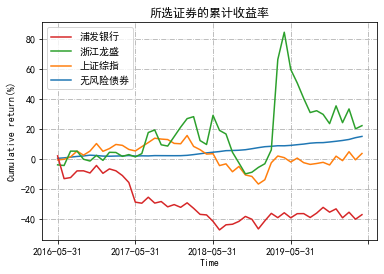

In [245]:
def cum_rate(df):
    # 股指、股票计算累计收益率
    df['cum_rate']=0
    df.loc[0,'cum_rate']=df.loc[0,'monthly_r']
    for i in range(1,len(df)):
        df.loc[i,'cum_rate']=((1+df.loc[i-1,'cum_rate']/100)*(1+df.loc[i,'monthly_r']/100)-1)*100
    return df

# 大盘股累计收益率
cum_rate(df1)
cum_rate_rb=df1['cum_rate']

# 小盘股累计收益率
cum_rate(df2)
cum_rate_rs=df2['cum_rate']

# 上证综指累计收益率
cum_rate(df3)
cum_rate_rm=df3['cum_rate']

# 无风险债券累计收益率
cum_rate(df4)
cum_rate_rf=df4['cum_rate']

# x轴
x=df1.date

plt.xticks(range(0,49,12))

plt.grid(linestyle='-.')

cum_rate_rf_plot,=plt.plot(x,cum_rate_rf)
cum_rate_rm_plot,=plt.plot(x,cum_rate_rm)
cum_rate_rs_plot,=plt.plot(x,cum_rate_rs)
cum_rate_rb_plot,=plt.plot(x,cum_rate_rb)

plt.legend([cum_rate_rb_plot, cum_rate_rs_plot,cum_rate_rm_plot, cum_rate_rf_plot], ["浦发银行","浙江龙盛", "上证综指", "无风险债券"], loc='upper left')

plt.xlabel("Time")
plt.ylabel("Cumulative return(%)")
plt.title("所选证券的累计收益率")

plt.show()

In [181]:
def compute_annual_profit(days, net_value):
    """
    计算年化收益
    """

    annual_profit = 0
    # 交易日数大于0，才计算年化收益
    if days > 0:
        # 计算年数
        years = days / 245
        # 计算年化收益
        annual_profit = pow(net_value, 1 / years) - 1

    # 将年化收益转化为百分数，保留两位小数
    annual_profit = round(annual_profit * 100, 2)

    return annual_profit

In [182]:
def compute_drawdown(net_values):
    """
    计算最大回撤
    :param net_values: 净值列表
    """
    # 最大回撤初始值设为0
    max_drawdown = 0
    index = 0
    # 双层循环找出最大回撤
    for net_value in net_values:
        # 计算从当前开始直到结束，和当前净值相比的最大回撤
        for sub_net_value in net_values[index:]:
            # 计算回撤
            drawdown = 1 - sub_net_value / net_value
            # 如果当前的回撤大于已经计算的最大回撤，则当前回撤作为最大回撤
            if drawdown > max_drawdown:
                max_drawdown = drawdown
        index += 1
    return max_drawdown

In [183]:
def compute_sharpe_ratio(net_values):
    """
    计算夏普比率
    :param net_values: 净值列表
    """

    # 总交易日数
    trading_days = len(net_values)
    # 所有收益的DataFrame
    profit_df = pd.DataFrame(columns={'profit'})
    # 收益之后，初始化为第一天的收益
    profit_df.loc[0] = {'profit': round((net_values[0] - 1) * 100, 2)}
    # 计算每天的收益
    for index in range(1, trading_days):
        # 计算每日的收益变化
        profit = (net_values[index] - net_values[index - 1]) / net_values[index - 1]
        profit = round(profit * 100, 2)
        profit_df.loc[index] = {'profit': profit}

    

    # 计算当日收益标准差
    profit_std = pow(profit_df['profit'].var(), 1 / 2)

    # 年化收益
    annual_profit = compute_annual_profit(trading_days, net_values[-1])

    # 夏普比率
    sharpe_ratio = (annual_profit - 4.75) / (profit_std * pow(245, 1 / 2))

    return sharpe_ratio

In [230]:
#计算年化收益
# 获取HS300每日收盘价，时间：2015-01-01至2018-12-31
df1_annual = jqdatasdk.get_price('600000.XSHG', start_date='2016-05-01', end_date='2020-05-31', frequency='daily', fields=['close'], skip_paused=False, fq='pre')

# 净值统计：以第一个交易日收盘价为参考，计算每日净值
first_close1 = df1_annual['close'][0]
net_values1 = df1_annual['close']/ first_close
net_values1

print('浦发银行年化收益率:', compute_annual_profit(len(df1_annual), net_values1[-1]), "%")
max_drawdown = compute_drawdown(list(net_values1))
print('浦发银行最大回撤:', round(max_drawdown * 100, 2), "%")
sharp1 = compute_sharpe_ratio(list(net_values1))
print('浦发银行夏普比率:', round(sharp1,3))

浦发银行年化收益率: -2.41 %
浦发银行最大回撤: 32.67 %
浦发银行夏普比率: -0.373


In [185]:
#计算年化收益
# 获取HS300每日收盘价，时间：2015-01-01至2018-12-31
df2_annual = jqdatasdk.get_price('600352.XSHG', start_date='2016-05-01', end_date='2020-05-31', frequency='daily', fields=['close'], skip_paused=False, fq='pre')

# 净值统计：以第一个交易日收盘价为参考，计算每日净值
first_close2 = df2_annual['close'][0]
net_values2 = df2_annual['close']/ first_close2
net_values2

print('浙江龙盛年化收益率:', compute_annual_profit(len(df2_annual), net_values2[-1]), "%")
max_drawdown = compute_drawdown(list(net_values2))
print('浙江龙盛最大回撤:', round(max_drawdown * 100, 2), "%")
sharp2 = compute_sharpe_ratio(list(net_values2))
print('浙江龙盛夏普比率:', round(sharp2,3))

浙江龙盛年化收益率: 8.34 %
浙江龙盛最大回撤: 53.21 %
浙江龙盛夏普比率: 0.102


In [186]:
#计算年化收益
# 获取HS300每日收盘价，时间：2015-01-01至2018-12-31
df3_annual = jqdatasdk.get_price('000001.XSHG', start_date='2016-05-01', end_date='2020-05-31', frequency='daily', fields=['close'], skip_paused=False, fq='pre')

# 净值统计：以第一个交易日收盘价为参考，计算每日净值
first_close3 = df3_annual['close'][0]
net_values3 = df3_annual['close']/ first_close3
net_values3

print('上证综指年化收益率:', compute_annual_profit(len(df3_annual), net_values3[-1]), "%")
max_drawdown = compute_drawdown(list(net_values3))
print('上证综指最大回撤:', round(max_drawdown * 100, 2), "%")
sharp3 = compute_sharpe_ratio(list(net_values3))
print('上证综指夏普比率:', round(sharp3,3))

上证综指年化收益率: -1.18 %
上证综指最大回撤: 30.77 %
上证综指夏普比率: -0.362


In [187]:
#计算年化收益
# 获取HS300每日收盘价，时间：2015-01-01至2018-12-31
df4_annual = jqdatasdk.get_price('000012.XSHG', start_date='2016-05-01', end_date='2020-05-31', frequency='daily', fields=['close'], skip_paused=False, fq='pre')

# 净值统计：以第一个交易日收盘价为参考，计算每日净值
first_close4 = df4_annual['close'][0]
net_values4 = df4_annual['close']/ first_close4
net_values4

print('中国国债年化收益率:', compute_annual_profit(len(df4_annual), net_values4[-1]), "%")
max_drawdown = compute_drawdown(list(net_values4))
print('中国国债最大回撤:', round(max_drawdown * 100, 2), "%")
sharp4 = compute_sharpe_ratio(list(net_values4))
print('中国国债夏普比率:', round(sharp4,3))

中国国债年化收益率: 3.85 %
中国国债最大回撤: 0.83 %
中国国债夏普比率: -1.42


In [188]:
# 创建包含四个asset的月收益率的DF
df4.reindex(index=[i for i in range(0,48)])

df_r = pd.DataFrame()
df_r['浦发银行']=df1['monthly_r']
df_r['浙江龙盛']=df2['monthly_r']
df_r['上证综指']=df3['monthly_r']
df_r['中国国债']=df4['monthly_r']

# df_r

In [231]:
# 计算两支股票的相关性
def get_cov(ret):
    data = ret.iloc[:,[0,1]]/100
    output = pd.DataFrame()
    output['均值'] = data.mean()
    output['方差'] = data.var()
    output['标准差'] = data.std()
    covxy = np.cov(data.iloc[:,0].values, data.iloc[:,1].values)
    coefxy = np.corrcoef(data.iloc[:,0].values,data.iloc[:,1].values)
    output['协方差'] = [np.NaN,covxy[0,1]]
    output['相关系数'] = [np.NaN,coefxy[0,1]]
    return output

get_cov(df_r)

,均值,方差,标准差,协方差,相关系数
浦发银行,-0.007865,0.003623,0.060194,NaN,NaN
浙江龙盛,0.008911,0.011494,0.107212,0.000714,0.110566


In [249]:
# CAPM模型估计和画图
def CAPM(df,column):
    x = df.iloc[:,[0,3]]
    x.columns = ['常数项','市场超额收益']
    x['常数项'] = 1
    x['市场超额收益'] = df.iloc[:,2]-df.iloc[:,3]  
    y = df.loc[:,column]-df.iloc[:,3]    
    plt.figure(figsize=(10,5))       
    plt.scatter(x.iloc[:,1],y,s = 30, c = 'black', marker = 'o', alpha = 0.9, linewidths = 0.3, label = '散点图')
    reg = LinearRegression().fit(x, y)  #线性拟合
    pred = reg.predict(x)
    plt.plot(x.iloc[:,1], pred, linewidth = 2, label = column+'-SCL')
    plt.grid(ls='--')
    plt.xlabel('上证指数的月度超额收益(%)')
    plt.ylabel(column+'的月度超额收益(%)')
    plt.title('证券特点线(SCL)-'+column)
    plt.show()    

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


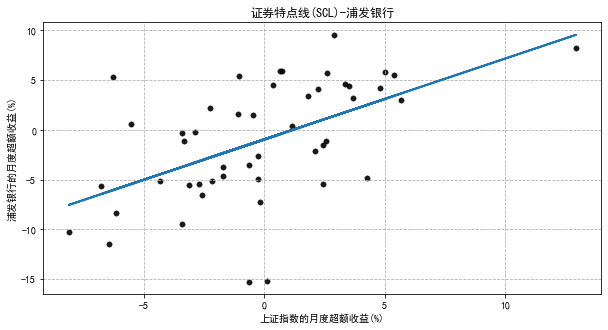

In [250]:
CAPM(df_r,'浦发银行')

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


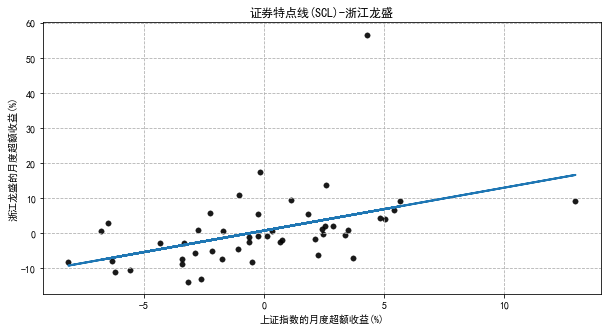

In [251]:
CAPM(df_r,'浙江龙盛')

In [252]:
#alpha和beta分解
# 分解α和β
def get_OLS(df,column):
    x = (df.iloc[:,2]-df.iloc[:,3])/100
    y = (df.loc[:,column]-df.iloc[:,3])/100
    X=sm.add_constant(x)
    model = sm.OLS(y,X)
    model = model.fit()
    return model,model.summary()
model1,summary1=get_OLS(df_r,'浙江龙盛')
model2,summary2=get_OLS(df_r,'浦发银行')

C:\Users\Marco\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [253]:
output = pd.DataFrame()
output['股票'] = ['浙江龙盛','浦发银行']
output['α'] = [model1.params['const'],model2.params['const']]
output['t-value1'] = [model1.tvalues['const'],model2.tvalues['const']]
output['含义1'] = ['超额收益','超额收益']
output['β'] = [model1.params[0],model2.params[0]]
output['t-value2'] = [model1.tvalues[0],model2.tvalues[0]]
output['含义2'] = ['与市场相关性','与市场相关性']
output

,股票,α,t-value1,含义1,β,t-value2,含义2
0,浙江龙盛,0.007752,0.554708,超额收益,1.224379,3.462209,与市场相关性
1,浦发银行,-0.009612,-1.293128,超额收益,0.811433,4.313566,与市场相关性


In [258]:
# 风险分析
def get_risk(df,column):
    x = (df.iloc[:,2]-df.iloc[:,3])
    y = (df.loc[:,column]-df.iloc[:,3])
    X=sm.add_constant(x)
    model = sm.OLS(y,X)
    model = model.fit()
    y_hat=model.predict(X)
    y_error = y - y_hat
    return y.std(), y_hat.std(),y_error.std()

output1 = pd.DataFrame()
output1['股票'] = ['浙江龙盛','浦发银行']
output1['总风险(%)'] = [get_risk(df_r,'浙江龙盛')[0],get_risk(df_r,'浦发银行')[0]]
output1['系统性风险(%)'] = [get_risk(df_r,'浙江龙盛')[1],get_risk(df_r,'浦发银行')[1]]
output1['公司风险(%)'] = [get_risk(df_r,'浙江龙盛')[2],get_risk(df_r,'浦发银行')[2]]
output1

,股票,总风险(%),系统性风险(%),公司风险(%)
0,浙江龙盛,10.746837,4.886175,9.571823
1,浦发银行,6.034045,3.238215,5.091528
